<a href="https://colab.research.google.com/github/sakinter774/ThinkStats2/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%5Bhomework_4_2_%5Dgame_of_thrones_prediction_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

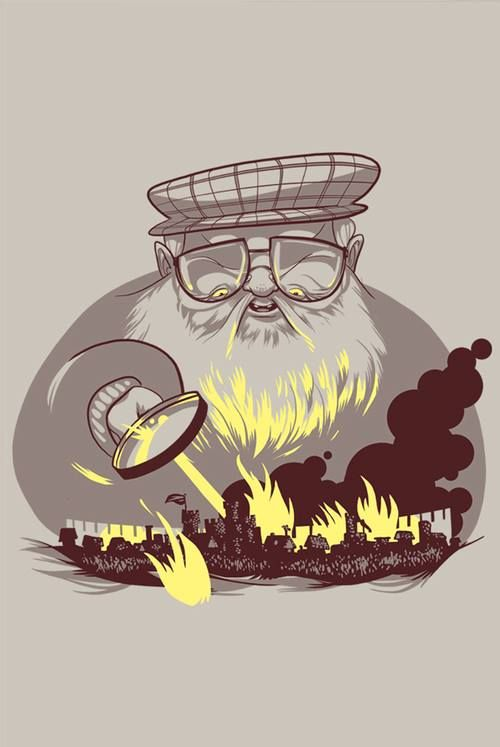

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [66]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 10.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [68]:
data1 = pd.read_csv('game_of_thrones_test.csv')
data1.tail()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
384,1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
385,1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
386,1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100
387,1945,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435
388,1946,Tytos Lannister,Casterly Rock,1,NaN,220.0,NaN,NaN,NaN,House Lannister,...,1,NaN,NaN,NaN,1.0,1,1,47.0,4,0.210702


In [69]:
data2=pd.read_csv('game_of_thrones_train.csv')
data2.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [70]:
data1.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity'],
      dtype='object')

In [71]:
data2.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [72]:
for i in data1.columns:
  data1[i]=data1[i].fillna(0)
for i in data2.columns:
  data2[i]=data2[i].fillna(0)

In [73]:
for i in data1.columns:
  if data1[i].dtypes=='object':
    data1[i]=data1[i].apply(lambda x: 'No title' if str(x)=='0' else x)



In [74]:
for i in data2.columns:
  if data2[i].dtypes=='object':
    data2[i]=data2[i].apply(lambda x: 'No title' if str(x)=='0' else x)

In [75]:
data2.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,No title,1,No title,0.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,No title,...,1.0,0.0,0.0,0.0,0,0,0.0,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,No title,No title,No title,House Frey,...,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,1,No title,0.0,No title,No title,No title,House Swyft,...,0.0,0.0,0.0,0.0,0,1,0.0,0,0.267559,1
3,4,Aemma Arryn,Queen,0,No title,82.0,No title,No title,No title,House Arryn,...,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,No title,No title,No title,House Santagar,...,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1


In [76]:
data1.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
0,1558,Melissa Blackwood,No title,0,No title,156.0,No title,No title,No title,House Blackwood,...,1,0.0,0.0,0.0,0.0,0,0,100.0,0,0.050167
1,1559,Melisandre,No title,0,Asshai,0.0,No title,No title,No title,R'hllor,...,1,0.0,0.0,0.0,0.0,0,0,0.0,0,0.745819
2,1560,Merrit,No title,0,No title,0.0,No title,No title,No title,Brotherhood without banners,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.010033
3,1561,Meryn Trant,Ser,1,No title,0.0,No title,No title,No title,House Trant,...,1,0.0,0.0,0.0,0.0,0,1,0.0,0,0.220736
4,1562,Merrett Frey,No title,1,Riverlands,262.0,No title,No title,No title,House Frey,...,1,0.0,0.0,0.0,1.0,1,0,38.0,0,0.434783


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [77]:
for i in data1.columns:
  print(i,data1[i].dtypes)

S.No int64
name object
title object
male int64
culture object
dateOfBirth float64
mother object
father object
heir object
house object
spouse object
book1 int64
book2 int64
book3 int64
book4 int64
book5 int64
isAliveMother float64
isAliveFather float64
isAliveHeir float64
isAliveSpouse float64
isMarried int64
isNoble int64
age float64
numDeadRelations int64
popularity float64


In [78]:
data1['numDeadRelations'].unique()

array([ 0,  5,  1,  2,  7,  4,  9, 15,  6,  8, 10, 11, 12])

In [79]:
data1['popularity']=data1['popularity'].apply(lambda x:0 if x<0.5 else 1 )
data2['popularity']=data2['popularity'].apply(lambda x:0 if x<0.5 else 1 )
#for i in data1.columns:
 # print(i,data1[i].dtypes)

In [80]:
data1['boolDeadRelations']=data1['numDeadRelations'].apply(lambda x: 1 if x>1 else 0)
data2['boolDeadRelations']=data2['numDeadRelations'].apply(lambda x: 1 if x>1 else 0)

In [81]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [82]:
def transform(x):
  for key, value in cult.items():
    if x in value:
      return key
      break
  else:
    return x
data1['culture']=data1['culture'].apply(lambda x: transform(x))

In [83]:
data2['culture']=data2['culture'].apply(lambda x:transform(x))

In [84]:
data1.culture.head()

,culture
0,No title
1,Asshai
2,No title
3,No title
4,Riverlands


In [85]:
data2.culture.head()

,culture
0,No title
1,Rivermen
2,No title
3,No title
4,Dornish


In [86]:
data2.culture.head()

,culture
0,No title
1,Rivermen
2,No title
3,No title
4,Dornish


In [87]:
data1['culture'].unique()

array(['No title', 'Asshai', 'Riverlands', 'Naathi', 'Free Folk',
       'Rivermen', 'Dornish', 'Ironborn', 'Dornishmen', 'Rhoynar',
       'Valemen', 'Free folk', 'Westermen', 'Dothraki', 'Northmen',
       'Ghiscari', 'Meereen', 'Valyrian', 'Ironmen', 'Norvos', 'Reach',
       'Stormlander', 'Westeros', 'Braavosi', 'Meereenese',
       'Northern mountain clans', 'First Men', 'Vale mountain clans',
       'Stormlands', 'Westerman', 'Lysene', 'Dorne', 'Tyroshi',
       'Pentoshi', 'Wildlings', 'Crannogmen', 'Westerlands', 'Lhazareen',
       'Qohor', 'Wildling', 'Astapor', 'Lyseni', 'Reachmen', "Asshai'i",
       'Ibbenese', 'Myrish', 'Qartheen', 'Summer Isles', 'The Reach'],
      dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=[...], inplace = True)

In [29]:
dict1={}
dict1={jj:j for j,jj in enumerate(data2['culture'].unique())}
dict1

{'No title': 0,
 'Rivermen': 1,
 'Dornish': 2,
 'Valyrian': 3,
 'Ironborn': 4,
 'Free Folk': 5,
 'Northmen': 6,
 'Summer Isles': 7,
 'Braavosi': 8,
 'Dothraki': 9,
 'Ghiscari': 10,
 'Vale mountain clans': 11,
 'Reach': 12,
 'Tyroshi': 13,
 'Lhazarene': 14,
 'Free folk': 15,
 'Ironmen': 16,
 'Qartheen': 17,
 'Lysene': 18,
 'Westermen': 19,
 'Westerman': 20,
 'Qarth': 21,
 'Lyseni': 22,
 'Qohor': 23,
 'Westeros': 24,
 'Norvoshi': 25,
 'First Men': 26,
 'Meereenese': 27,
 'Andal': 28,
 'Astapori': 29,
 'ironborn': 30,
 'Ghiscaricari': 31,
 'Braavos': 32,
 'Stormlands': 33,
 'Valemen': 34,
 'Myrish': 35,
 'Lhazareen': 36,
 'Dornishmen': 37,
 'Sistermen': 38,
 'Northern mountain clans': 39,
 'Andals': 40,
 'Vale': 41,
 'Crannogmen': 42,
 'Wildling': 43,
 'Dorne': 44,
 'Pentoshi': 45,
 'Summer Islander': 46,
 'Westerlands': 47,
 'Summer Islands': 48}

In [89]:
for i in data2.columns:
  if data2[i].dtypes=='object':
    dict1={}
    dict1={jj:j for j,jj in enumerate(data2[i].unique())}
    data2[i]=data2[i].apply(lambda x: dict1.get(x,0))
    data1[i]=data1[i].apply(lambda x:dict1.get(x,0))
    dict3={}
    if i!='isAlive':
      dict3={j: len(data2[data2[i]==j])/len(data2) for j in data2[i].unique() }
      data2[i]=data2[i].apply(lambda x:dict3.get(x,0 ))
      data1[i]=data1[i].apply(lambda x:dict3.get(x,0 ))

data2.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations
0,1,0,0.539499,1,0.686577,0.0,0.001285,0.001285,0.000642,0.244701,...,0.0,0.0,0.0,0,0,0.0,11,1,0,1
1,2,1,0.000642,1,0.006423,208.0,0.988439,0.985870,0.986513,0.057161,...,0.0,0.0,1.0,1,1,97.0,1,1,1,0
2,3,2,0.196532,1,0.686577,0.0,0.988439,0.985870,0.986513,0.004496,...,0.0,0.0,0.0,0,1,0.0,0,0,1,0
3,4,3,0.001927,0,0.686577,82.0,0.988439,0.985870,0.986513,0.007065,...,0.0,0.0,0.0,1,1,23.0,0,0,0,0
4,5,4,0.000642,0,0.010918,276.0,0.988439,0.985870,0.986513,0.001285,...,0.0,0.0,1.0,1,1,29.0,0,0,1,0


In [90]:
data1.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,boolDeadRelations
0,1558,0,0.539499,0,0.686577,156.0,0.988439,0.98587,0.986513,0.001927,...,0.0,0.0,0.0,0.0,0,0,100.0,0,0,0
1,1559,0,0.539499,0,0.686577,0.0,0.988439,0.98587,0.986513,0.000642,...,0.0,0.0,0.0,0.0,0,0,0.0,0,1,0
2,1560,0,0.539499,0,0.686577,0.0,0.988439,0.98587,0.986513,0.002569,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0
3,1561,0,0.196532,1,0.686577,0.0,0.988439,0.98587,0.986513,0.244701,...,0.0,0.0,0.0,0.0,0,1,0.0,0,0,0
4,1562,0,0.539499,1,0.686577,262.0,0.988439,0.98587,0.986513,0.057161,...,0.0,0.0,0.0,1.0,1,0,38.0,0,0,0


In [91]:
import numpy as np
import statsmodels.api as sm
# Import libraries
import seaborn as sns # for Data visualization

from scipy.stats import norm
import matplotlib.pyplot as plt
Y = data2['isAlive']
for i in ['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother','father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4','book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir','isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations','popularity',  'boolDeadRelations']:
  X = data2[i]
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  #print(results.summary())
  yhat=results.predict()
  rss=np.sum((Y-yhat)**2) #отражает оставшуюся дисперсию значений зависимой переменной
  ssr=np.sum((yhat-Y.mean())**2) #сумма квадратов регрессии
  #print('rss+ssr=',rss+ssr, ' связь между квадратами')
  tss=np.sum((Y-Y.mean())**2)
  tss1=np.sum((yhat-yhat.mean())**2)
  #print('tss=',tss,' общая сумма квадратов')
  print(i)
  print('F=',((tss-rss)/1)/(rss/(len(data2)-1-1)),'F-критерий указывает на зависимость Y от X.')
  R2=1-rss/tss
  print('R2=',R2)

S.No
F= 2.3441057654409274 F-критерий указывает на зависимость Y от X.
R2= 0.0015051944889782343
name
F= 2.3441057654409274 F-критерий указывает на зависимость Y от X.
R2= 0.0015051944889782343
title
F= 6.209426588900456 F-критерий указывает на зависимость Y от X.
R2= 0.003977318150369835
male
F= 34.96335433171901 F-критерий указывает на зависимость Y от X.
R2= 0.021990037843617194
culture
F= 0.21891377836142206 F-критерий указывает на зависимость Y от X.
R2= 0.00014076074848501374
dateOfBirth
F= 1.136407890395639 F-критерий указывает на зависимость Y от X.
R2= 0.0007302752410608404
mother
F= 40.4905275402216 F-критерий указывает на зависимость Y от X.
R2= 0.02537810588110867
father
F= 33.757356956392336 F-критерий указывает на зависимость Y от X.
R2= 0.021247647923444912
heir
F= 36.835608026148485 F-критерий указывает на зависимость Y от X.
R2= 0.0231403342408103
house
F= 0.6604890216972298 F-критерий указывает на зависимость Y от X.
R2= 0.00042457144496388377
spouse
F= 3.795193997628

In [93]:
importantpred=['title','male','mother','father','heir','book1','book4','isAliveMother','isAliveHeir','age','numDeadRelations','popularity','boolDeadRelations']

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<Axes: xlabel='isAlive', ylabel='Count'>

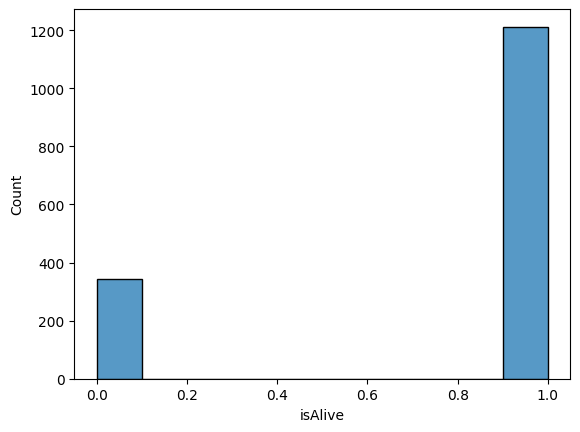

In [92]:
sns.histplot(data=Y,bins=10)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [94]:
X = data2[importantpred]
y = data2[['isAlive']]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [95]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [97]:
from sklearn.linear_model import LogisticRegression

In [102]:
from sklearn.ensemble import AdaBoostClassifier



In [106]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [98]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

ImportError: attempted relative import with no known parent package

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [126]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
modelada = abc.fit(X_train, y_train)
y_pred1 = modelada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [128]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X_train, y_train)
y_pred3=gpc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
new_model=knn.fit(X_train, y_train)
predicted1=new_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [100]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [130]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


In [131]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7778


In [132]:
accuracy=accuracy_score(y_test,y_pred3)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


In [133]:
accuracy=accuracy_score(y_test,predicted1)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6752


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

In [145]:
X1 = data1[importantpred]
y_pred = logistic_regression.predict(X1)
len(y_pred)

389

In [141]:
submission['isAlive']=y_pred

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [140]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.48MB/s]


In [148]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [144]:
submission.head()

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [150]:
submission.to_csv("submission.csv", index=False)